<a href="https://colab.research.google.com/github/wZZ22Z/Thesis_Source_Code/blob/main/%E6%AF%95%E4%B8%9A%E8%AE%BA%E6%96%87%E4%BB%A3%E7%A0%81_Llama_2_7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 毕业论文代码

Smooth+AWQ
## Llama-2.7b

#### Token

使用自己的huggingface token登录来使用llama模型

## 1.安装事先需要准备的包

#### install dataset

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

#### 导入模型

In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
The token `llama2-7b-readOnly` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `llama2

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

llama_model_path = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(llama_model_path)
# 如果没有指定 pad_token，手动设置
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # 或者自定义的 '[PAD]'
llama_model_2_7b_fp16 = AutoModelForCausalLM.from_pretrained(llama_model_path, device_map="auto", torch_dtype="auto")
print(llama_model_2_7b_fp16)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((4096,), eps=1e-05)
    (rotary_e

## 2.实现smooth操作

In [ ]:
import torch
from transformers.models.opt.modeling_opt import (
    OPTAttention,
    OPTDecoderLayer,
    OPTForCausalLM,
)
from transformers import GPT2Tokenizer
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn

from transformers.models.opt.modeling_opt import OPTDecoderLayer
from transformers.models.bloom.modeling_bloom import BloomBlock
from transformers.models.llama.modeling_llama import LlamaDecoderLayer, LlamaRMSNorm
from transformers.models.mistral.modeling_mistral import (
    MistralDecoderLayer,
    MistralRMSNorm,
)
from transformers.models.mixtral.modeling_mixtral import (
    MixtralDecoderLayer,
    MixtralRMSNorm,
)
from transformers.models.falcon.modeling_falcon import FalconDecoderLayer


@torch.no_grad()
def smooth_ln_fcs(ln, fcs, act_scales, alpha=0.5):
    if not isinstance(fcs, list):
        fcs = [fcs]
    assert isinstance(ln, nn.LayerNorm)
    for fc in fcs:
        assert isinstance(fc, nn.Linear)
        assert ln.weight.numel() == fc.in_features == act_scales.numel()

    device, dtype = fcs[0].weight.device, fcs[0].weight.dtype
    act_scales = act_scales.to(device=device, dtype=dtype)
    weight_scales = torch.cat(
        [fc.weight.abs().max(dim=0, keepdim=True)[0] for fc in fcs], dim=0
    )
    weight_scales = weight_scales.max(dim=0)[0].clamp(min=1e-5)

    scales = (
        (act_scales.pow(alpha) / weight_scales.pow(1 - alpha))
        .clamp(min=1e-5)
        .to(device)
        .to(dtype)
    )

    ln.weight.div_(scales)
    ln.bias.div_(scales)

    for fc in fcs:
        fc.weight.mul_(scales.view(1, -1))


@torch.no_grad()
def smooth_ln_fcs_llama_like(ln, fcs, act_scales, alpha=0.5):
    if not isinstance(fcs, list):
        fcs = [fcs]
    assert isinstance(ln, (LlamaRMSNorm, MistralRMSNorm, MixtralRMSNorm))
    for fc in fcs:
        assert isinstance(fc, nn.Linear)
        assert ln.weight.numel() == fc.in_features == act_scales.numel()
    device, dtype = fcs[0].weight.device, fcs[0].weight.dtype
    act_scales = act_scales.to(device=device, dtype=dtype)
    weight_scales = torch.cat(
        [fc.weight.abs().max(dim=0, keepdim=True)[0] for fc in fcs], dim=0
    )
    weight_scales = weight_scales.max(dim=0)[0].clamp(min=1e-5)
    scales = (
        (act_scales.pow(alpha) / weight_scales.pow(1 - alpha))
        .clamp(min=1e-5)
        .to(device)
        .to(dtype)
    )

    ln.weight.div_(scales)
    for fc in fcs:
        fc.weight.mul_(scales.view(1, -1))


@torch.no_grad()
def smooth_lm(model, scales, alpha=0.5):
    for name, module in model.named_modules():
        if isinstance(module, OPTDecoderLayer):
            attn_ln = module.self_attn_layer_norm
            qkv = [
                module.self_attn.q_proj,
                module.self_attn.k_proj,
                module.self_attn.v_proj,
            ]
            qkv_input_scales = scales[name + ".self_attn.q_proj"]
            smooth_ln_fcs(attn_ln, qkv, qkv_input_scales, alpha)

            ffn_ln = module.final_layer_norm
            fc1 = module.fc1
            fc1_input_scales = scales[name + ".fc1"]
            smooth_ln_fcs(ffn_ln, fc1, fc1_input_scales, alpha)
        elif isinstance(module, (LlamaDecoderLayer, MistralDecoderLayer)):
            attn_ln = module.input_layernorm  # attention forward norm
            qkv = [
                module.self_attn.q_proj,
                module.self_attn.k_proj,
                module.self_attn.v_proj,
            ]

            qkv_input_scales = scales[name + ".self_attn.q_proj"]
            smooth_ln_fcs_llama_like(attn_ln, qkv, qkv_input_scales, alpha)

            ffn_ln = module.post_attention_layernorm  # feed forward norm
            fcs = [module.mlp.gate_proj, module.mlp.up_proj]
            fcs_input_scales = scales[name + ".mlp.gate_proj"]

            smooth_ln_fcs_llama_like(ffn_ln, fcs, fcs_input_scales, alpha)
        elif isinstance(module, MixtralDecoderLayer):
            attn_ln = module.input_layernorm  # attention forward norm
            qkv = [
                module.self_attn.q_proj,
                module.self_attn.k_proj,
                module.self_attn.v_proj,
            ]

            qkv_input_scales = scales[name + ".self_attn.q_proj"]
            smooth_ln_fcs_llama_like(attn_ln, qkv, qkv_input_scales, alpha)

            ffn_ln = module.post_attention_layernorm  # feed forward norm
            fcs = [module.block_sparse_moe.gate]
            for expert in module.block_sparse_moe.experts:
                fcs.append(expert.w1)
                fcs.append(expert.w3)
            fcs_input_scales = scales[name + ".block_sparse_moe.gate"]

            smooth_ln_fcs_llama_like(ffn_ln, fcs, fcs_input_scales, alpha)

## 3.实现任务评估器

### LAMBADA 任务简介

#### 概述
LAMBADA（Language Modeling Broadened to Account for Discourse Aspects）是一种评估语言模型理解长程依赖能力的任务。该任务要求模型根据给定的上下文预测目标句子中的最后一个单词。

#### 任务特点
- **长程依赖**：需要模型理解整个段落的语义信息
- **上下文敏感**：正确预测通常依赖于多个句子的信息
- **自然语言理解**：测试模型对复杂语言结构的理解能力

#### 数据格式
```text
Context: "一段包含多个句子的上下文"
Target: "需要预测的目标词"
```

#### 示例
```text
Context: "小明去了商店。他买了一些水果，包括苹果、香蕉和橙子。当他回到家时，他发现忘记买了最重要的东西——"
Target: "草莓"
```

#### 评价指标
- **准确率**：正确预测目标词的比例
$$
Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

#### 任务意义
- 衡量模型对上下文的理解能力
- 测试模型处理长文本的能力
- 评估模型在实际应用场景中的表现



#### 具体代码实现：

In [ ]:
from torch.amp import autocast

class Evaluator_lambada:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

        # Tokenize the dataset
        def tokenize_function(examples):
            return self.tokenizer(examples["text"])

        self.dataset = self.dataset.map(tokenize_function, batched=True)
        self.dataset.set_format(type="torch", columns=["input_ids"])

    @torch.no_grad()  # 需要放在函数定义外部
    def evaluate(self, model):
        model.eval()

        total, hit = 0, 0
        for batch in self.dataset:
            input_ids = batch["input_ids"].to(self.device)  # 确保数据在 GPU
            input_ids = input_ids.unsqueeze(0)  # 添加 batch 维度

            label = input_ids[:, -1]  # 目标 token

            # 使用自动混合精度计算
            with autocast('cuda'):  # 使用新的方式指定设备
                outputs = model(input_ids)  # 进行推理
                last_token_logits = outputs.logits[:, -2, :]  # 获取倒数第二个 token 的 logits
                pred = last_token_logits.argmax(dim=-1)  # 预测 token

            total += label.size(0)
            hit += (pred == label).sum().item()

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset


dataset_lambada = load_dataset("lambada", split="validation[:1000]")
evaluator_lambada = Evaluator_lambada(dataset_lambada, tokenizer, "cuda")

README.md:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/269M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2662 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4869 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

### HellaSwag 任务简介

#### 概述
HellaSwag（Harder Endings, Longer contexts, and Logical Assumptions in Situations With Antecedent Graphs）是一种评估模型常识推理和情境理解能力的任务。该任务要求模型根据给定的情境选择最可能的后续事件。

#### 任务特点
- **常识推理**：需要模型具备日常生活的常识性知识
- **情境理解**：正确答案依赖于对上下文情境的深入理解
- **多选项选择**：从多个候选答案中选择最合理的后续
- **长文本处理**：涉及较长的上下文描述

#### 数据格式
```text
Context: "一段描述情境的上下文"
Candidates: ["选项1", "选项2", "选项3", "选项4"]
Answer: "正确答案的索引或内容"
```

#### 示例
```text
Context: "一个人在切菜时，发现刀变得越来越钝。接下来他可能会做什么？"
Candidates: ["继续切菜", "停下来磨刀", "换一把刀", "直接用手撕"]
Answer: "停下来磨刀"
```

#### 评价指标
- **准确率**：正确选择后续事件的比例
$$
Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

#### 任务意义
- 衡量模型的常识推理能力
- 测试模型对真实世界情境的理解水平
- 评估模型生成合理预测的能力
- 在对话系统、故事生成等应用场景中具有重要价值

HellaSwag任务通过设计具有挑战性的情境推理问题，能够有效测试语言模型是否真正理解了人类行为和常识逻辑，而不仅仅是依赖表面的语言模式匹配。

### 代码实现：

In [ ]:
from torch.amp import autocast

class Evaluator_HellaSwag:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            ctx_a = sample["ctx_a"]  # 获取第一部分上下文
            ctx_b = sample["ctx_b"]  # 获取第二部分上下文
            endings = sample["endings"]  # 获取四个结尾选项
            correct_label = sample["label"]  # 正确答案的标签，如 '3' 对应选项 'D'

            # Tokenize the context and all endings
            inputs = [self.tokenizer(ctx_a + " " + ctx_b + " " + ending, return_tensors="pt").to(self.device) for ending in endings]

            # 计算每个选项的 logits
            logits = []
            with autocast(device_type='cuda'):  # 开启混合精度
                for input_ids in inputs:
                    output = model(**input_ids)
                    logits.append(output.logits[:, -1, :].max().item())  # 获取每个选项的最大分数

            # 根据最高分数选择答案
            pred = logits.index(max(logits))  # 选择分数最高的选项的索引

            # 将预测结果与正确标签对比
            hit += (pred == int(correct_label))  # 判断预测是否正确
            total += 1

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset



# 加载 HellaSwag 数据集
dataset_hellaswag = load_dataset("hellaswag", split="validation[:1000]",trust_remote_code=True)


# 创建评估器
evaluator_hellaswag = Evaluator_HellaSwag(dataset_hellaswag, tokenizer, "cuda")




README.md:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

hellaswag.py:   0%|          | 0.00/4.36k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/2.53k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39905 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10042 [00:00<?, ? examples/s]

### PIQA 任务简介

#### 概述  
PIQA（Physical Interaction QA）是一种评估模型对物理常识和实际交互理解能力的任务。该任务要求模型根据问题选择最符合物理常识或实际生活逻辑的答案。

#### 任务特点  
- **物理常识**：需要模型掌握与物理世界交互的基本知识  
- **实用性**：侧重于日常生活中实际问题的解决能力  
- **多选项选择**：从两个候选答案中选择最合理的解决方案  
- **人类行为理解**：涉及对人类行为及其后果的推理  

#### 数据格式  
```text
Question: "描述一个问题的情境"
Candidates: ["选项1", "选项2"]
Answer: "正确答案的索引或内容"
```

#### 示例  
```text
Question: "如何让一杯热水快速冷却？"  
Candidates: ["将杯子放入冰箱", "用吹风机对着杯子吹"]  
Answer: "将杯子放入冰箱"  
```

#### 评价指标  
- **准确率**：正确选择解决方案的比例  
$$
Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$  

#### 任务意义  
- 衡量模型对物理常识的理解能力  
- 测试模型在实际生活场景中的推理水平  
- 评估模型生成合理解决方案的能力  
- 在智能家居、机器人交互等应用场景中具有重要价值  


In [ ]:
from torch.amp import autocast

class Evaluator_PIQA:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            question = sample["goal"]
            option1 = sample["sol1"]
            option2 = sample["sol2"]
            correct_label = sample["label"]  # 0 or 1

            # 计算两个选项的得分
            inputs1 = self.tokenizer(question + " " + option1, return_tensors="pt").to(self.device)
            inputs2 = self.tokenizer(question + " " + option2, return_tensors="pt").to(self.device)

            # 使用混合精度进行计算
            with autocast("cuda"):
                logits1 = model(**inputs1).logits[:, -1, :].to(torch.float32)  # 转换为 float32
                logits2 = model(**inputs2).logits[:, -1, :].to(torch.float32)

            # 获取每个选项的最大 logit
            score1 = torch.max(logits1).item()  # 选出最高的 logit
            score2 = torch.max(logits2).item()

            # 根据分数选择答案
            pred = 0 if score1 > score2 else 1
            hit += int(pred == correct_label)
            total += 1

        # 计算准确率
        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset

dataset_piqa = load_dataset("piqa", split="validation[:1000]",trust_remote_code=True)

evaluator_piqa = Evaluator_PIQA(dataset_piqa, tokenizer, "cuda")

README.md:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

piqa.py:   0%|          | 0.00/5.36k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16113 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3084 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1838 [00:00<?, ? examples/s]

### WSC

In [ ]:
from torch.amp import autocast

class Evaluator_WSC:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            sentence = sample["text"]
            options = sample["options"]
            correct_label = sample["label"]  # 0 或 1

            scores = []
            for option in options:
                input_text = sentence.replace("___", option)  # 替换空白处
                inputs = self.tokenizer(input_text, return_tensors="pt").to(self.device)

                with autocast("cuda"):
                    logits = model(**inputs).logits[:, -1, :].to(torch.float32)

                scores.append(logits.max().item())

            pred = scores.index(max(scores))  # 获取最大得分的索引

            hit += (pred == correct_label)
            total += 1

        acc = hit / total
        return acc


In [ ]:

from datasets import load_dataset

dataset_wsc = load_dataset("winograd_wsc", "wsc285", split="test[:1000]",trust_remote_code=True)  # 或 "wsc273"

evaluator_wsc = Evaluator_WSC(dataset_wsc, tokenizer, "cuda")


README.md:   0%|          | 0.00/8.61k [00:00<?, ?B/s]

winograd_wsc.py:   0%|          | 0.00/5.42k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/285 [00:00<?, ? examples/s]

### ARC

In [ ]:
from torch.amp import autocast

class Evaluator_ARC:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            question = sample["question"]
            choices = sample["choices"]["text"]  # 获取所有选项的文本
            correct_label = sample["answerKey"]  # 正确答案的标签，例如 'D'

            # Tokenize the question and all choices
            inputs = [self.tokenizer(question + " " + choice, return_tensors="pt").to(self.device) for choice in choices]

            # 使用每个选项的 logits 进行预测
            logits = []
            for input_ids in inputs:
                with autocast(device_type='cuda'):  # 使用新的方式指定设备
                    output = model(**input_ids)
                    logits.append(output.logits[:, -1, :].max().item())  # 获取每个选项的最大分数

            # 根据最高分数选择答案
            pred_index = logits.index(max(logits))  # 获取分数最高的选项的索引
            pred = chr(ord('A') + pred_index)  # 将索引转换为字母标签（例如 0 -> 'A', 1 -> 'B', ...）

            # 将预测结果与正确标签对比
            hit += (pred == correct_label)  # 判断预测是否正确
            total += 1

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset

dataset_arc = load_dataset("ai2_arc", "ARC-Challenge", split="validation[:1000]")  # 或 "ARC-Easy"

evaluator_arc = Evaluator_ARC(dataset_arc, tokenizer, "cuda")


README.md:   0%|          | 0.00/9.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00001.parquet:   0%|          | 0.00/190k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/204k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


validation-00000-of-00001.parquet:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1119 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1172 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/299 [00:00<?, ? examples/s]

### BooIQ

In [ ]:
from torch.amp import autocast

class Evaluator_BoolQ:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            question = sample["question"]
            passage = sample["passage"]
            correct_label = sample["answer"]  # 0 (False) 或 1 (True)

            input_text = question + " " + passage
            inputs = self.tokenizer(input_text, return_tensors="pt").to(self.device)

            with autocast("cuda"):
                logits = model(**inputs).logits[:, -1, :].to(torch.float32)

            pred = 1 if logits.max().item() > 0 else 0
            hit += int(pred == correct_label)
            total += 1

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset


dataset_boolq = load_dataset("boolq", split="validation[:1000]")

evaluator_boolq = Evaluator_BoolQ(dataset_boolq, tokenizer, "cuda")


README.md:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.69M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9427 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3270 [00:00<?, ? examples/s]

### RACE

In [ ]:
from torch.amp import autocast
class Evaluator_RACE:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            article = sample["article"]  # 获取文章内容
            question = sample["question"]  # 获取问题
            choices = sample["options"]  # 获取所有选项
            correct_label = sample["answer"]  # 获取正确答案的标签（例如 'C'）

            # Tokenize the article, question, and all choices
            inputs = [self.tokenizer(article + " " + question + " " + choice, return_tensors="pt").to(self.device) for choice in choices]

            # 使用每个选项的 logits 进行预测
            logits = []
            for input_ids in inputs:
              with autocast(device_type='cuda'):  # 使用新的方式指定设备
                output = model(**input_ids)
                logits.append(output.logits[:, -1, :].max().item())  # 获取每个选项的最大分数

            # 根据最高分数选择答案
            pred_index = logits.index(max(logits))  # 获取分数最高的选项的索引
            pred = chr(ord('A') + pred_index)  # 将索引转换为字母标签（例如 0 -> 'A', 1 -> 'B', ...）

            # 将预测结果与正确标签对比
            hit += (pred == correct_label)  # 判断预测是否正确
            total += 1

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset


dataset_race = load_dataset("race", "middle", split="validation[:1000]")  # 可选择 "high" 或 "middle"

evaluator_race = Evaluator_RACE(dataset_race, tokenizer, "cuda")


README.md:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/405k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.97M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/407k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1436 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/25421 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1436 [00:00<?, ? examples/s]

### WinoGrande

In [ ]:
from torch.amp import autocast

class Evaluator_WinoGrande:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            sentence = sample["sentence"]  # 获取句子
            option1 = sample["option1"]  # 选项1
            option2 = sample["option2"]  # 选项2
            correct_label = sample["answer"]  # 正确答案，通常是 '1' 或 '2'

            # 生成两个可能的输入文本
            inputs = [
                self.tokenizer(sentence.replace("_", option1), return_tensors="pt").to(self.device),
                self.tokenizer(sentence.replace("_", option2), return_tensors="pt").to(self.device)
            ]

            # 计算两个选项的 logits
            logits = []
            with autocast(device_type='cuda'):  # 开启混合精度
                for input_ids in inputs:
                    output = model(**input_ids)
                    logits.append(output.logits[:, -1, :].max().item())  # 获取最高分数

            # 选择分数最高的选项
            pred = logits.index(max(logits)) + 1  # 索引从0开始，因此需要 +1

            # 计算正确率
            hit += (pred == int(correct_label))
            total += 1

        acc = hit / total
        return acc


In [ ]:
from datasets import load_dataset


# 加载 WinoGrande 数据集
dataset_winogrande = load_dataset("winogrande", "winogrande_xl", split="validation[:1000]",trust_remote_code=True)  # 选择 winogrande_xl 子集

# 创建评估器
evaluator_winogrande = Evaluator_WinoGrande(dataset_winogrande, tokenizer, "cuda")


README.md:   0%|          | 0.00/9.97k [00:00<?, ?B/s]

winogrande.py:   0%|          | 0.00/5.65k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/40398 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1767 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1267 [00:00<?, ? examples/s]

### OpenBookQA

In [ ]:
from torch.amp import autocast

class Evaluator_OpenBookQA:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device
        self.label_map = {"A": 0, "B": 1, "C": 2, "D": 3}  # 选项标签映射

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            question = sample["question_stem"]  # 获取问题
            options = sample["choices"]["text"]  # 获取 4 个选项
            correct_label = self.label_map[sample["answerKey"]]  # 解析正确答案索引

            # 构造 4 个输入（问题 + 选项）
            inputs = [
                self.tokenizer(question + " " + option, return_tensors="pt").to(self.device)
                for option in options
            ]

            # 计算 logits
            logits = []
            with autocast(device_type='cuda'):  # 开启混合精度推理
                for input_ids in inputs:
                    output = model(**input_ids)
                    logits.append(output.logits[:, -1, :].max().item())  # 获取最大 logits 值

            # 选择最高分的答案
            pred = logits.index(max(logits))

            # 计算准确率
            hit += (pred == correct_label)
            total += 1

        acc = hit / total
        return acc

In [ ]:
from datasets import load_dataset


dataset_openbookqa = load_dataset("openbookqa", "main", split="validation")  # 加载 OpenBookQA 数据

evaluator_openbookqa = Evaluator_OpenBookQA(dataset_openbookqa, tokenizer, "cuda")



README.md:   0%|          | 0.00/9.06k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/496k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4957 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

### COPA

In [ ]:
from torch.amp import autocast

class Evaluator_COPA:
    def __init__(self, dataset, tokenizer, device):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.device = device

    @torch.no_grad()
    def evaluate(self, model):
        # model.to(self.device)
        model.eval()

        total, hit = 0, 0
        for sample in self.dataset:
            premise = sample["premise"]
            choice1 = sample["choice1"]
            choice2 = sample["choice2"]
            question = sample["question"]  # "cause" or "effect"
            correct_label = sample["label"]  # 0 或 1

            # 根据 question 拼接文本
            if question == "cause":
                input1 = f"什么是原因？ {choice1} 因为 {premise}"
                input2 = f"什么是原因？ {choice2} 因为 {premise}"
            else:
                input1 = f"会导致什么结果？ {premise} 所以 {choice1}"
                input2 = f"会导致什么结果？ {premise} 所以 {choice2}"

            # Tokenization
            inputs = [
                self.tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(self.device)
                for text in [input1, input2]
            ]

            # 计算 logits
            logits = []
            with autocast(device_type='cuda'):  # 开启混合精度推理
                for input_ids in inputs:
                    output = model(**input_ids)
                    logits.append(output.logits[:, -1, :].max().item())  # 取最大 logits 作为得分

            # 选择得分最高的选项
            pred = logits.index(max(logits))

            # 计算准确率
            hit += (pred == correct_label)
            total += 1

        acc = hit / total
        return acc

In [ ]:
from datasets import load_dataset


dataset_copa = load_dataset("super_glue", "copa", split="validation",trust_remote_code=True)  # 加载 COPA 数据

evaluator_copa = Evaluator_COPA(dataset_copa, tokenizer, "cuda")


README.md:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

super_glue.py:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

## 4.计算模型大小函数

In [ ]:
def print_model_size(model):
    # https://discuss.pytorch.org/t/finding-model-size/130275
    param_size = sum(p.nelement() * p.element_size() for p in model.parameters())
    buffer_size = sum(b.nelement() * b.element_size() for b in model.buffers())

    size_all_gb = (param_size + buffer_size) / 1024**3  # 转换为 GB
    print('Model size: {:.3f}GB'.format(size_all_gb))


## 5.打印模型架构和baseline

In [ ]:
import functools
from functools import partial
import numpy as np
from tqdm import tqdm
import os

#### 让我们打印Llama-7b的模型结构

In [ ]:
print_model_size(llama_model_2_7b_fp16)

Model size: 12.551GB


In [ ]:
acc_model_fp16_copa = evaluator_copa.evaluate(llama_model_2_7b_fp16)
print(f"COPA Accuracy: {acc_model_fp16_copa:.4f}")

acc_model_fp16_openbookqa = evaluator_openbookqa.evaluate(llama_model_2_7b_fp16)
print(f"OpenBookQA Accuracy: {acc_model_fp16_openbookqa:.4f}")

acc_model_fp16_winogrande = evaluator_winogrande.evaluate(llama_model_2_7b_fp16)
print(f"WinoGrande Accuracy: {acc_model_fp16_winogrande:.4f}")



Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


COPA Accuracy: 0.5900
OpenBookQA Accuracy: 0.3820
WinoGrande Accuracy: 0.5800


In [ ]:
acc_model_fp16_lambada = evaluator_lambada.evaluate(llama_model_2_7b_fp16)
print(f"LAMBADA Accuracy: {acc_model_fp16_lambada:.4f}")

acc_model_fp16_piqa = evaluator_piqa.evaluate(llama_model_2_7b_fp16)
print(f"PIQA Accuracy: {acc_model_fp16_piqa:.4f}")

acc_model_fp16_wsc = evaluator_wsc.evaluate(llama_model_2_7b_fp16)
print(f"WSC Accuracy: {acc_model_fp16_wsc:.4f}")

acc_model_fp16_arc = evaluator_arc.evaluate(llama_model_2_7b_fp16)
print(f"ARC Accuracy: {acc_model_fp16_arc:.4f}")

acc_model_fp16_boolq = evaluator_boolq.evaluate(llama_model_2_7b_fp16)
print(f"BoolQ Accuracy: {acc_model_fp16_boolq:.4f}")

acc_model_fp16_race = evaluator_race.evaluate(llama_model_2_7b_fp16)
print(f"RACE Accuracy: {acc_model_fp16_race:.4f}")
# 评估模型
acc_model_hellaswag = evaluator_hellaswag.evaluate(llama_model_2_7b_fp16)
print(f"HellaSwag Accuracy: {acc_model_hellaswag:.4f}")
del llama_model_2_7b_fp16

LAMBADA Accuracy: 0.8850
PIQA Accuracy: 0.6030
WSC Accuracy: 0.5018
ARC Accuracy: 0.2843
BoolQ Accuracy: 0.6250
RACE Accuracy: 0.3710
HellaSwag Accuracy: 0.3640


## 6.自定义获取act_scale, 可以跳过

In [ ]:
# origin: def get_act_scales(model, tokenizer, dataset_path num_samples=512, seq_len=512):
def get_act_scales(model, tokenizer, dataset_name, num_samples=512, seq_len=512):
    model.eval()
    device = next(model.parameters()).device
    act_scales = {}

    def stat_tensor(name, tensor):
        hidden_dim = tensor.shape[-1]
        tensor = tensor.view(-1, hidden_dim).abs().detach()
        comming_max = torch.max(tensor, dim=0)[0].float().cpu()
        if name in act_scales:
            act_scales[name] = torch.max(act_scales[name], comming_max)
        else:
            act_scales[name] = comming_max

    def stat_input_hook(m, x, y, name):
        if isinstance(x, tuple):
            x = x[0]
        stat_tensor(name, x)

    hooks = []
    for name, m in model.named_modules():
        if isinstance(m, torch.nn.Linear):
            hooks.append(
                m.register_forward_hook(functools.partial(stat_input_hook, name=name))
            )

    # 使用 datasets 库下载 Pile 数据集的验证集（或其他数据集）
    dataset = load_dataset(dataset_name, split="train")  # 你可以更改为 "train" 或其他切分
    dataset = dataset.shuffle(seed=42)

    for i in tqdm(range(num_samples)):
        input_ids = tokenizer(
            dataset[i]["text"], return_tensors="pt", max_length=seq_len, truncation=True
        ).input_ids.to(device)
        model(input_ids)

    for h in hooks:
        h.remove()

    return act_scales


In [ ]:
act_scales = get_act_scales(
    model_fp16,
    tokenizer,
    dataset_name="Skylion007/openwebtext",  # 数据集名称
    num_samples=512,
    seq_len=512
)
print(type(act_scales))
output_path = "act_scales/opt-2.7b.pt"  # 你希望保存的路径
os.makedirs(os.path.dirname(output_path), exist_ok=True)
torch.save(act_scales, output_path)
print(f"激活值缩放因子已保存到 {output_path}")



README.md:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

openwebtext.py:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

KeyboardInterrupt: Interrupted by user

## 7.在线获取对应模型的act_scale

In [ ]:
from huggingface_hub import hf_hub_download
import torch

# 下载 `llama-2-7b.pt` 文件
model_repo = "mit-han-lab/smoothquant-scales"
filename = "llama-2-7b.pt"

file_path = hf_hub_download(repo_id=model_repo, filename=filename)

# 加载 `act_scales`
act_scales = torch.load(file_path, map_location="cpu")
act_scales = {k: v.to("cuda") for k, v in act_scales.items()}



llama-2-7b.pt:   0%|          | 0.00/4.64M [00:00<?, ?B/s]

## 8.Smooth结果可视化

#### 可视化函数

In [ ]:
# 运行推理并获取激活值和权重
@torch.no_grad()
def get_OPT_activations_and_weights(model, tokenizer, texts, layer_index = 4, channel_indexs = 200, device="cpu"):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)

    print("outputs.hidden_states shape is ", len(outputs.hidden_states))

    activation = outputs.hidden_states[layer_index].abs()[:, :, :channel_indexs]  # 最后一层激活值，选择前100个token和通道

    q_weight = model.model.decoder.layers[layer_index].self_attn.q_proj.weight.abs()[:, :channel_indexs]
    k_weight = model.model.decoder.layers[layer_index].self_attn.k_proj.weight.abs()[:, :channel_indexs]
    v_weight = model.model.decoder.layers[layer_index].self_attn.v_proj.weight.abs()[:, :channel_indexs]

    fcs = [q_weight,  k_weight, v_weight]

    print(f"activation shape is {activation.shape} self_attn.q_proj.weight shape is {fcs[0].shape}")
    # **手动释放 outputs**
    del outputs
    torch.cuda.empty_cache()  # 清理显存缓存

    return activation, fcs
@torch.no_grad()
def get_Llama_activations_and_weights(model, tokenizer, texts, layer_index = 4, channel_indexs = 200, device="cpu"):
    # Tokenize the input texts
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).to(device)

    with torch.no_grad():
        # Pass through the model, requesting hidden states
        outputs = model(**inputs, output_hidden_states=True)

    print("outputs.hidden_states shape is ", len(outputs.hidden_states))

    # Get the absolute value of activations for the specified layer and channel
    activation = outputs.hidden_states[layer_index].abs()[:, :, :channel_indexs]  # Select first 200 channels

    # Extract attention weights for q_proj, k_proj, and v_proj in the specified layer
    q_weight = model.model.layers[layer_index].self_attn.q_proj.weight.abs()[:, :channel_indexs]
    k_weight = model.model.layers[layer_index].self_attn.k_proj.weight.abs()[:, :channel_indexs]
    v_weight = model.model.layers[layer_index].self_attn.v_proj.weight.abs()[:, :channel_indexs]

    # Combine weights into a list for later inspection
    fcs = [q_weight, k_weight, v_weight]

    print(f"activation shape is {activation.shape} self_attn.q_proj.weight shape is {fcs[0].shape}")

    return activation, fcs


@torch.no_grad()
def apply_smoothquant_scaling(activation, weights, scales):
    device = activation.device  # 获取 activation 所在的设备
    scales = scales.to(device)  # 将 scales 移动到同一设备
    smooth_activation = activation / scales.view(1, 1, -1)
    q_proj_weight = weights[0]
    smooth_q_weight = q_proj_weight * scales.view(1, -1)
    print(f"smooth_activation_sample shape is {smooth_activation.shape} q_proj smooth_weight shape is {smooth_q_weight.shape}")

    return smooth_activation, smooth_q_weight

# 检测离群值并打印通道索引
def find_outlier_channels(activation_sample, threshold=10):
    mean = activation_sample.mean(dim=(0, 1))
    std = activation_sample.std(dim=(0, 1))
    z_scores = (activation_sample - mean) / std

    outliers = torch.where(z_scores > threshold)
    unique_channels = torch.unique(outliers[2])
    print(f"离群值所在的通道索引: {unique_channels.tolist()}")

# 3D 绘图函数
def plot_3d(data, title, xlabel, ylabel, zlabel, color, ax, y_max):
    x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
    x, y = x.flatten(), y.flatten()
    z = np.zeros_like(x)
    dx = dy = 1
    dz = data.flatten()
    ax.bar3d(x, y, z, dx, dy, dz, color=color, zsort='average')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_zlim(0, y_max)  # 设置统一的 y 轴范围

#### 选择model类型、输入、观察的layer-index和channel数

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# 处理输入文本并获取激活值和权重
input_texts = [
  "The quick brown fox jumps over the lazy dog. " * 2,  # 通过重复句子生成超过64个词的文本
  "Artificial intelligence is revolutionizing the world. " * 2,
  "Large language models are powerful tools for NLP tasks. " * 2,
  "The meaning of life is to find " * 2
  ]
layer_index = 8
channel_index = 800
activation_sample, weight_sample = get_Llama_activations_and_weights(llama_model_2_7b_fp16, tokenizer, input_texts, layer_index = layer_index,  channel_indexs=channel_index, device=device)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


outputs.hidden_states shape is  33
activation shape is torch.Size([4, 26, 800]) self_attn.q_proj.weight shape is torch.Size([4096, 800])


#### 打印最终的图表

离群值所在的通道索引: []
smooth_activation_sample shape is torch.Size([4, 26, 800]) q_proj smooth_weight shape is torch.Size([4096, 800])


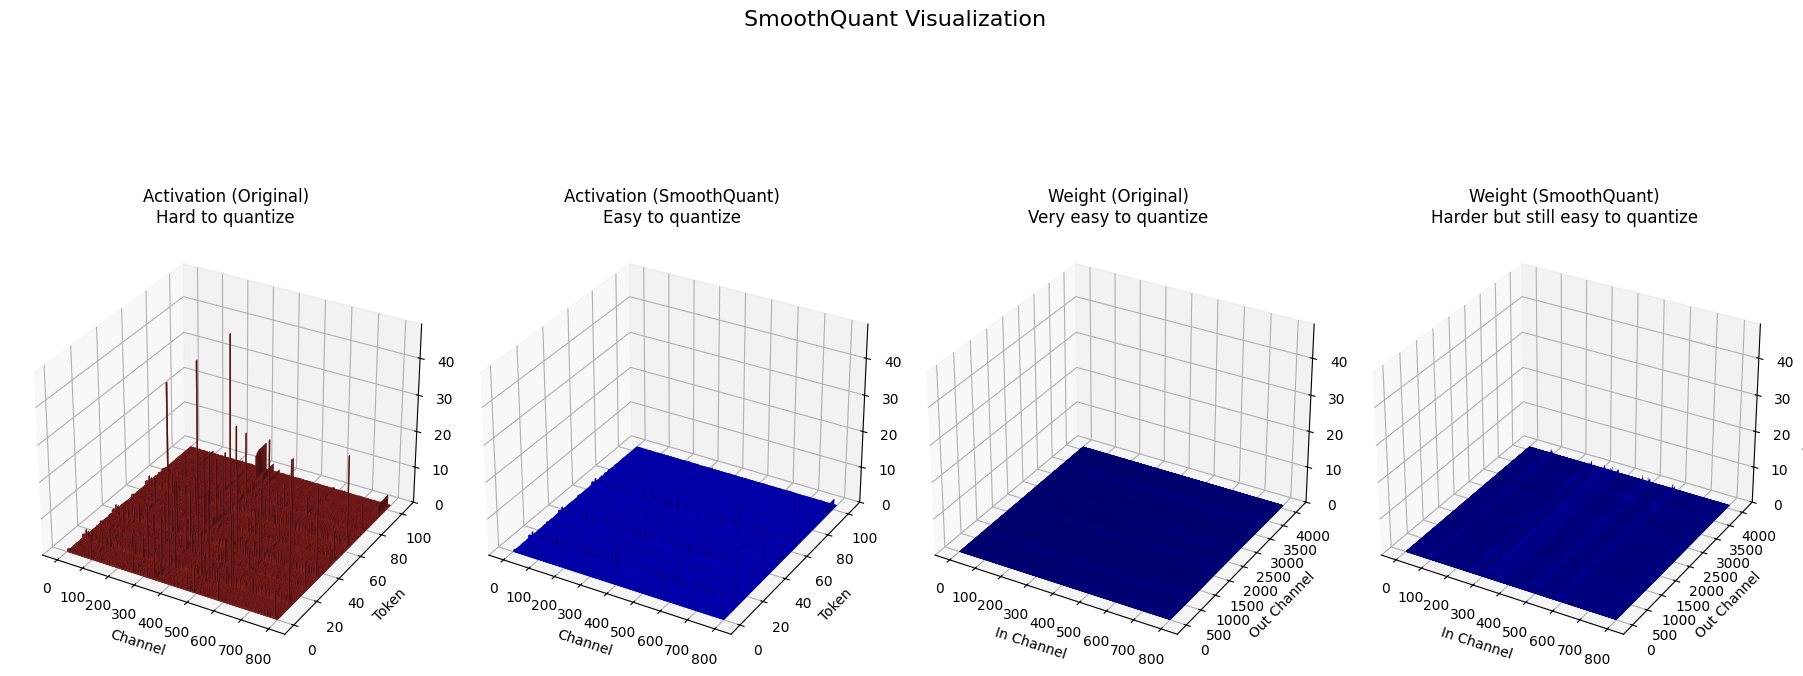

In [ ]:

# 检查离群值所在通道
find_outlier_channels(activation_sample)


# 找到act_scale
specific_location = f"model.layers.{layer_index}.self_attn.q_proj"
  # 打印出该层的结构，确认路径
  # 打印出该层的结构，确认路径

scales = act_scales[specific_location]
scales = scales[:channel_index]
smooth_activation_sample, smooth_weight_sample = apply_smoothquant_scaling(activation_sample, weight_sample, scales)
# 确定所有图的统一 y 轴范围
y_max = max(
    np.max(activation_sample.cpu().numpy()),
    np.max(smooth_activation_sample.cpu().numpy()),
    np.max(weight_sample[0].cpu().numpy()),
    np.max(smooth_weight_sample.cpu().numpy())
        )

# 创建图表
fig = plt.figure(figsize=(18, 8))
batch_size, seq_len, hidden_size = activation_sample.shape
activation_sample = activation_sample.view(-1, hidden_size)
smooth_activation_sample = smooth_activation_sample.view(-1, hidden_size)

# 绘制原始和平滑后的激活值和权重, weight_sample 是 q、k、v 映射层权重组合的列表
plot_titles = [
    ("Activation (Original)\nHard to quantize", activation_sample, "brown"),
    ("Activation (SmoothQuant)\nEasy to quantize", smooth_activation_sample, "blue"),
    ("Weight (Original)\nVery easy to quantize", weight_sample[0], "blue"),
    ("Weight (SmoothQuant)\nHarder but still easy to quantize", smooth_weight_sample, "blue")
        ]

for i, (title, data, color) in enumerate(plot_titles, start=1):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    xlabel = "Channel" if "Activation" in title else "In Channel"
    ylabel = "Token" if "Activation" in title else "Out Channel"
    plot_3d(data.detach().cpu().numpy(), title, xlabel, ylabel, "Absolute Value", color, ax, y_max)

# 添加主标题并保存图表
fig.suptitle("SmoothQuant Visualization", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()  # 仅显示，不保存


## 9.smooth操作

#### 普通量化

In [ ]:
import torch
from torch import nn
from functools import partial


@torch.no_grad()
def quantize_weight_per_channel_absmax(w, n_bits=8):
    # w: (out_features, in_features)
    scales = w.abs().max(dim=-1, keepdim=True)[0]
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    w.div_(scales).round_().mul_(scales)
    return w


@torch.no_grad()
def quantize_weight_per_tensor_absmax(w, n_bits=8):
    # w: (out_features, in_features)
    scales = w.abs().max()
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    w.div_(scales).round_().mul_(scales)
    return w


@torch.no_grad()
def quantize_activation_per_token_absmax(t, n_bits=8):
    t_shape = t.shape
    t.view(-1, t_shape[-1])
    scales = t.abs().max(dim=-1, keepdim=True)[0]
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    t.div_(scales).round_().mul_(scales)
    return t


@torch.no_grad()
def quantize_activation_per_tensor_absmax(t, n_bits=8):
    t_shape = t.shape
    t.view(-1, t_shape[-1])
    scales = t.abs().max()
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    t.div_(scales).round_().mul_(scales)
    return t


class W8A8Linear(nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        bias=True,
        act_quant="per_token",
        quantize_output=False,
    ):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.register_buffer(
            "weight",
            torch.randn(
                self.out_features,
                self.in_features,
                dtype=torch.float16,
                requires_grad=False,
            ),
        )
        if bias:
            self.register_buffer(
                "bias",
                torch.zeros(
                    (1, self.out_features), dtype=torch.float16, requires_grad=False
                ),
            )
        else:
            self.register_buffer("bias", None)

        if act_quant == "per_token":
            self.act_quant_name = "per_token"
            self.act_quant = partial(quantize_activation_per_token_absmax, n_bits=8)
        elif act_quant == "per_tensor":
            self.act_quant_name = "per_tensor"
            self.act_quant = partial(quantize_activation_per_tensor_absmax, n_bits=8)
        else:
            raise ValueError(f"Invalid act_quant: {act_quant}")

        if quantize_output:
            self.output_quant_name = self.act_quant_name
            self.output_quant = self.act_quant
        else:
            self.output_quant_name = "None"
            self.output_quant = lambda x: x

    def to(self, *args, **kwargs):
        super(W8A8Linear, self).to(*args, **kwargs)
        self.weight = self.weight.to(*args, **kwargs)
        if self.bias is not None:
            self.bias = self.bias.to(*args, **kwargs)
        return self

    @torch.no_grad()
    def forward(self, x):
        q_x = self.act_quant(x)
        y = torch.functional.F.linear(q_x, self.weight, self.bias)
        q_y = self.output_quant(y)
        return q_y

    @staticmethod
    def from_float(
        module, weight_quant="per_channel", act_quant="per_token", quantize_output=False
    ):
        assert isinstance(module, torch.nn.Linear)
        new_module = W8A8Linear(
            module.in_features,
            module.out_features,
            module.bias is not None,
            act_quant=act_quant,
            quantize_output=quantize_output,
        )
        if weight_quant == "per_channel":
            new_module.weight = quantize_weight_per_channel_absmax(
                module.weight, n_bits=8
            )  # use 8-bit integer for weight
        elif weight_quant == "per_tensor":
            new_module.weight = quantize_weight_per_tensor_absmax(
                module.weight, n_bits=8
            )
        else:
            raise ValueError(f"Invalid weight_quant: {weight_quant}")
        new_module.weight_quant_name = weight_quant
        if module.bias is not None:
            new_module.bias = module.bias
        return new_module

    def __repr__(self):
        return f"W8A8Linear({self.in_features}, {self.out_features}, bias={self.bias is not None}, weight_quant={self.weight_quant_name}, act_quant={self.act_quant_name}, output_quant={self.output_quant_name})"


def naive_quantize_opt(
    model, weight_quant="per_tensor", act_quant="per_tensor", quantize_bmm_input=True
):
    from transformers.models.opt.modeling_opt import (
        OPTAttention,
        OPTDecoderLayer,
    )

    for name, m in model.model.named_modules():
        if isinstance(m, OPTDecoderLayer):
            m.fc1 = W8A8Linear.from_float(
                m.fc1, weight_quant=weight_quant, act_quant=act_quant
            )
            m.fc2 = W8A8Linear.from_float(
                m.fc2, weight_quant=weight_quant, act_quant=act_quant
            )
        elif isinstance(m, OPTAttention):
            # Her we simulate quantizing BMM inputs by quantizing the output of q_proj, k_proj, v_proj
            m.q_proj = W8A8Linear.from_float(
                m.q_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.k_proj = W8A8Linear.from_float(
                m.k_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.v_proj = W8A8Linear.from_float(
                m.v_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.out_proj = W8A8Linear.from_float(
                m.out_proj, weight_quant=weight_quant, act_quant=act_quant
            )
    return model


def naive_quantize_llama_like(
    model, weight_quant="per_channel", act_quant="per_token", quantize_bmm_input=False
):
    from transformers.models.llama.modeling_llama import (
        LlamaAttention,
        LlamaMLP,
    )

    from transformers.models.mistral.modeling_mistral import (
        MistralAttention,
        MistralMLP,
    )

    for name, m in model.model.named_modules():
        if isinstance(m, (LlamaMLP, MistralMLP)):
            m.gate_proj = W8A8Linear.from_float(
                m.gate_proj, weight_quant=weight_quant, act_quant=act_quant
            )
            m.up_proj = W8A8Linear.from_float(
                m.up_proj, weight_quant=weight_quant, act_quant=act_quant
            )
            m.down_proj = W8A8Linear.from_float(
                m.down_proj, weight_quant=weight_quant, act_quant=act_quant
            )
        elif isinstance(m, (LlamaAttention, MistralAttention)):
            # Her we simulate quantizing BMM inputs by quantizing the output of q_proj, k_proj, v_proj
            m.q_proj = W8A8Linear.from_float(
                m.q_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.k_proj = W8A8Linear.from_float(
                m.k_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.v_proj = W8A8Linear.from_float(
                m.v_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
            )
            m.o_proj = W8A8Linear.from_float(
                m.o_proj, weight_quant=weight_quant, act_quant=act_quant
            )
    return model


#### AWQ+Smooth

In [ ]:
import torch
from torch import nn
from functools import partial


@torch.no_grad()
def quantize_weight_per_channel_absmax(w, n_bits=8):
    scales = w.abs().max(dim=-1, keepdim=True)[0]
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    w.div_(scales).round_().mul_(scales)
    return w


@torch.no_grad()
def quantize_weight_per_tensor_absmax(w, n_bits=8):
    scales = w.abs().max()
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    w.div_(scales).round_().mul_(scales)
    return w


@torch.no_grad()
def quantize_activation_per_token_absmax(t, n_bits=8):
    t_shape = t.shape
    t.view(-1, t_shape[-1])
    scales = t.abs().max(dim=-1, keepdim=True)[0]
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    t.div_(scales).round_().mul_(scales)
    return t


@torch.no_grad()
def quantize_activation_per_tensor_absmax(t, n_bits=8):
    t_shape = t.shape
    t.view(-1, t_shape[-1])
    scales = t.abs().max()
    q_max = 2 ** (n_bits - 1) - 1
    scales.clamp_(min=1e-5).div_(q_max)
    t.div_(scales).round_().mul_(scales)
    return t


def find_significant_weights(w, top_n_percent=1):
    # 按绝对值排序，选择top_n%作为显著权重
    abs_weights = w.abs()
    num_significant = max(1, int(w.numel() * top_n_percent / 100))  # 至少保留1个显著权重
    significant_weights, _ = torch.topk(abs_weights.view(-1), num_significant)
    threshold = significant_weights.min()
    # 找到大于等于阈值的权重，标记为显著权重
    significant_mask = abs_weights >= threshold
    return significant_mask


class AWQLinear(nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        bias=True,
        act_quant="per_token",
        quantize_output=False,
        top_n_percent=1,  # 新增参数：显著权重百分比
    ):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.top_n_percent = top_n_percent

        self.register_buffer(
            "weight",
            torch.randn(
                self.out_features,
                self.in_features,
                dtype=torch.float16,
                requires_grad=False,
            ),
        )
        if bias:
            self.register_buffer(
                "bias",
                torch.zeros(
                    (1, self.out_features), dtype=torch.float16, requires_grad=False
                ),
            )
        else:
            self.register_buffer("bias", None)

        # 激活量化策略
        if act_quant == "per_token":
            self.act_quant_name = "per_token"
            self.act_quant = partial(quantize_activation_per_token_absmax, n_bits=8)
        elif act_quant == "per_tensor":
            self.act_quant_name = "per_tensor"
            self.act_quant = partial(quantize_activation_per_tensor_absmax, n_bits=8)
        else:
            raise ValueError(f"Invalid act_quant: {act_quant}")

        # 输出量化策略
        if quantize_output:
            self.output_quant_name = self.act_quant_name
            self.output_quant = self.act_quant
        else:
            self.output_quant_name = "None"
            self.output_quant = lambda x: x

    def to(self, *args, **kwargs):
        super(AWQLinear, self).to(*args, **kwargs)
        self.weight = self.weight.to(*args, **kwargs)
        if self.bias is not None:
            self.bias = self.bias.to(*args, **kwargs)
        return self

    @torch.no_grad()
    def forward(self, x):
        # 选择显著权重
        significant_mask = find_significant_weights(self.weight, self.top_n_percent)
        significant_weights = self.weight * significant_mask.float()  # 保留显著权重

        # 对其余权重进行量化
        non_significant_weights = self.weight * (1 - significant_mask.float())
        quantized_weights = quantize_weight_per_channel_absmax(non_significant_weights, n_bits=8)
        quantized_weights += significant_weights  # 显著权重保留不变

        # 对输入激活进行量化
        q_x = self.act_quant(x)

        # 使用量化后的权重进行线性变换
        y = torch.functional.F.linear(q_x, quantized_weights, self.bias)

        # 对输出激活进行量化
        q_y = self.output_quant(y)
        return q_y

    @staticmethod
    def from_float(
        module, weight_quant="per_channel", act_quant="per_token", quantize_output=False, top_n_percent=1
    ):
        assert isinstance(module, torch.nn.Linear)
        new_module = AWQLinear(
            module.in_features,
            module.out_features,
            module.bias is not None,
            act_quant=act_quant,
            quantize_output=quantize_output,
            top_n_percent=top_n_percent,
        )
        if weight_quant == "per_channel":
            new_module.weight = quantize_weight_per_channel_absmax(
                module.weight, n_bits=8
            )
        elif weight_quant == "per_tensor":
            new_module.weight = quantize_weight_per_tensor_absmax(
                module.weight, n_bits=8
            )
        else:
            raise ValueError(f"Invalid weight_quant: {weight_quant}")
        new_module.weight_quant_name = weight_quant
        if module.bias is not None:
            new_module.bias = module.bias
        return new_module

    def __repr__(self):
        return f"AWQLinear({self.in_features}, {self.out_features}, bias={self.bias is not None}, weight_quant={self.weight_quant_name}, act_quant={self.act_quant_name}, output_quant={self.output_quant_name})"


def AWQ_quantize_opt(
    model, weight_quant="per_tensor", act_quant="per_tensor", quantize_bmm_input=True, top_n_percent=1
):
    from transformers.models.opt.modeling_opt import (
        OPTAttention,
        OPTDecoderLayer,
    )

    for name, m in model.model.named_modules():
        if isinstance(m, OPTDecoderLayer):
            m.fc1 = AWQLinear.from_float(
                m.fc1, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
            m.fc2 = AWQLinear.from_float(
                m.fc2, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
        elif isinstance(m, OPTAttention):
            m.q_proj = AWQLinear.from_float(
                m.q_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.k_proj = AWQLinear.from_float(
                m.k_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.v_proj = AWQLinear.from_float(
                m.v_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.out_proj = AWQLinear.from_float(
                m.out_proj, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
    return model

def AWQ_quantize_llama_like(
    model,
    weight_quant="per_channel",
    act_quant="per_token",
    quantize_bmm_input=True,
    top_n_percent=1,
):
    from transformers.models.llama.modeling_llama import (
        LlamaAttention,
        LlamaMLP,
    )
    from transformers.models.mistral.modeling_mistral import (
        MistralAttention,
        MistralMLP,
    )

    for name, m in model.model.named_modules():
        if isinstance(m, (LlamaMLP, MistralMLP)):
            m.gate_proj = AWQLinear.from_float(
                m.gate_proj, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
            m.up_proj = AWQLinear.from_float(
                m.up_proj, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
            m.down_proj = AWQLinear.from_float(
                m.down_proj, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )
        elif isinstance(m, (LlamaAttention, MistralAttention)):
            m.q_proj = AWQLinear.from_float(
                m.q_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.k_proj = AWQLinear.from_float(
                m.k_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.v_proj = AWQLinear.from_float(
                m.v_proj,
                weight_quant=weight_quant,
                act_quant=act_quant,
                quantize_output=quantize_bmm_input,
                top_n_percent=top_n_percent,
            )
            m.o_proj = AWQLinear.from_float(
                m.o_proj, weight_quant=weight_quant, act_quant=act_quant, top_n_percent=top_n_percent
            )

    return model


#### smooth+W8A8+AWQ

In [ ]:
my_act_scales = torch.load(file_path)
model_original_fp16 = AutoModelForCausalLM.from_pretrained(
    llama_model_path, torch_dtype=torch.float16, device_map="auto"
)
smooth_lm(model_original_fp16, my_act_scales, 0.5)
model_W8A8_AWQ = AWQ_quantize_llama_like(model_original_fp16, weight_quant="per_channel")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

#### 评估

In [ ]:
# 评估 W8A8_AWQ 量化模型
acc_model_W8A8_AWQ_copa = evaluator_copa.evaluate(model_W8A8_AWQ)
print(f"COPA Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_copa:.4f}")

acc_model_W8A8_AWQ_openbookqa = evaluator_openbookqa.evaluate(model_W8A8_AWQ)
print(f"OpenBookQA Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_openbookqa:.4f}")

acc_model_W8A8_AWQ_winogrande = evaluator_winogrande.evaluate(model_W8A8_AWQ)
print(f"WinoGrande Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_winogrande:.4f}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


COPA Accuracy (W8A8_AWQ): 0.5900
OpenBookQA Accuracy (W8A8_AWQ): 0.3780
WinoGrande Accuracy (W8A8_AWQ): 0.4890


In [ ]:
# 评估
acc_model_W8A8_AWQ_lambada = evaluator_lambada.evaluate(model_W8A8_AWQ)
print(f"LAMBADA Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_lambada:.4f}")

acc_model_W8A8_AWQ_piqa = evaluator_piqa.evaluate(model_W8A8_AWQ)
print(f"PIQA Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_piqa:.4f}")

acc_model_W8A8_AWQ_wsc = evaluator_wsc.evaluate(model_W8A8_AWQ)
print(f"WSC Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_wsc:.4f}")

acc_model_W8A8_AWQ_arc = evaluator_arc.evaluate(model_W8A8_AWQ)
print(f"ARC Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_arc:.4f}")

acc_model_W8A8_AWQ_boolq = evaluator_boolq.evaluate(model_W8A8_AWQ)
print(f"BoolQ Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_boolq:.4f}")

acc_model_W8A8_AWQ_race = evaluator_race.evaluate(model_W8A8_AWQ)
print(f"RACE Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_race:.4f}")

acc_model_W8A8_AWQ_hellaswag = evaluator_hellaswag.evaluate(model_W8A8_AWQ)
print(f"HellaSwag Accuracy (W8A8_AWQ): {acc_model_W8A8_AWQ_hellaswag:.4f}")
del model_original_fp16  # 删除原始模型
del model_W8A8_AWQ       # 删除量化模型

LAMBADA Accuracy (W8A8_AWQ): 0.8790
PIQA Accuracy (W8A8_AWQ): 0.5450
WSC Accuracy (W8A8_AWQ): 0.5018
ARC Accuracy (W8A8_AWQ): 0.2676
BoolQ Accuracy (W8A8_AWQ): 0.6250
RACE Accuracy (W8A8_AWQ): 0.3640
HellaSwag Accuracy (W8A8_AWQ): 0.3610


#### smooth + W8A8

In [ ]:
my_act_scales = torch.load(file_path)
model_original_fp16 = AutoModelForCausalLM.from_pretrained(
    llama_model_path, torch_dtype=torch.float16, device_map="auto"
)
smooth_lm(model_original_fp16, my_act_scales, 0.5)
model_W8A8_Naive = naive_quantize_llama_like(model_original_fp16, weight_quant="per_channel")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# 评估 W8A8_Naive 量化模型
acc_model_W8A8_Naive_copa = evaluator_copa.evaluate(model_W8A8_Naive)
print(f"COPA Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_copa:.4f}")

acc_model_W8A8_Naive_openbookqa = evaluator_openbookqa.evaluate(model_W8A8_Naive)
print(f"OpenBookQA Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_openbookqa:.4f}")

acc_model_W8A8_Naive_winogrande = evaluator_winogrande.evaluate(model_W8A8_Naive)
print(f"WinoGrande Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_winogrande:.4f}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


COPA Accuracy (W8A8_Naive): 0.5400
OpenBookQA Accuracy (W8A8_Naive): 0.3880
WinoGrande Accuracy (W8A8_Naive): 0.4870


In [ ]:
# 评估
acc_model_W8A8_Naive_lambada = evaluator_lambada.evaluate(model_W8A8_Naive)
print(f"LAMBADA Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_lambada:.4f}")

acc_model_W8A8_Naive_piqa = evaluator_piqa.evaluate(model_W8A8_Naive)
print(f"PIQA Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_piqa:.4f}")

acc_model_W8A8_Naive_wsc = evaluator_wsc.evaluate(model_W8A8_Naive)
print(f"WSC Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_wsc:.4f}")

acc_model_W8A8_Naive_arc = evaluator_arc.evaluate(model_W8A8_Naive)
print(f"ARC Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_arc:.4f}")

acc_model_W8A8_Naive_boolq = evaluator_boolq.evaluate(model_W8A8_Naive)
print(f"BoolQ Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_boolq:.4f}")

acc_model_W8A8_Naive_race = evaluator_race.evaluate(model_W8A8_Naive)
print(f"RACE Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_race:.4f}")

acc_model_W8A8_Naive_hellaswag = evaluator_hellaswag.evaluate(model_W8A8_Naive)
print(f"HellaSwag Accuracy (W8A8_Naive): {acc_model_W8A8_Naive_hellaswag:.4f}")

del model_original_fp16  # 删除原始模型
del model_W8A8_Naive       # 删除量化模型

LAMBADA Accuracy (W8A8_Naive): 0.8810
PIQA Accuracy (W8A8_Naive): 0.5600
WSC Accuracy (W8A8_Naive): 0.5018
ARC Accuracy (W8A8_Naive): 0.2609
BoolQ Accuracy (W8A8_Naive): 0.6250
RACE Accuracy (W8A8_Naive): 0.3630
HellaSwag Accuracy (W8A8_Naive): 0.3530


#### 不smooth，直接W8A8

In [ ]:
model_original_fp16 = AutoModelForCausalLM.from_pretrained(
    llama_model_path, torch_dtype=torch.float16, device_map="auto"
)
model_W8A8_Naive_Without_Smooth = naive_quantize_llama_like(model_original_fp16, weight_quant="per_channel")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# 评估 W8A8_Naive_Without_Smooth 量化模型
acc_model_W8A8_Naive_Without_Smooth_copa = evaluator_copa.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"COPA Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_copa:.4f}")

acc_model_W8A8_Naive_Without_Smooth_openbookqa = evaluator_openbookqa.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"OpenBookQA Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_openbookqa:.4f}")

acc_model_W8A8_Naive_Without_Smooth_winogrande = evaluator_winogrande.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"WinoGrande Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_winogrande:.4f}")


COPA Accuracy (W8A8_Naive_Without_Smooth): 0.5800
OpenBookQA Accuracy (W8A8_Naive_Without_Smooth): 0.2660
WinoGrande Accuracy (W8A8_Naive_Without_Smooth): 0.4820


In [ ]:

# 评估
acc_model_W8A8_Naive_Without_Smooth_lambada = evaluator_lambada.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"LAMBADA Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_lambada:.4f}")

acc_model_W8A8_Naive_Without_Smooth_piqa = evaluator_piqa.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"PIQA Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_piqa:.4f}")

acc_model_W8A8_Naive_Without_Smooth_wsc = evaluator_wsc.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"WSC Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_wsc:.4f}")

acc_model_W8A8_Naive_Without_Smooth_arc = evaluator_arc.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"ARC Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_arc:.4f}")

acc_model_W8A8_Naive_Without_Smooth_boolq = evaluator_boolq.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"BoolQ Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_boolq:.4f}")

acc_model_W8A8_Naive_Without_Smooth_race = evaluator_race.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"RACE Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_race:.4f}")

acc_model_W8A8_Naive_Without_Smooth_hellaswag = evaluator_hellaswag.evaluate(model_W8A8_Naive_Without_Smooth)
print(f"HellaSwag Accuracy (W8A8_Naive_Without_Smooth): {acc_model_W8A8_Naive_Without_Smooth_hellaswag:.4f}")

del model_original_fp16
del model_W8A8_Naive_Without_Smooth

LAMBADA Accuracy (W8A8_Naive_Without_Smooth): 0.7960
PIQA Accuracy (W8A8_Naive_Without_Smooth): 0.4790
WSC Accuracy (W8A8_Naive_Without_Smooth): 0.5018
ARC Accuracy (W8A8_Naive_Without_Smooth): 0.2977
BoolQ Accuracy (W8A8_Naive_Without_Smooth): 0.6250
RACE Accuracy (W8A8_Naive_Without_Smooth): 0.2620
HellaSwag Accuracy (W8A8_Naive_Without_Smooth): 0.2540


#### 不smooth，直接W8A8+AWQ

In [ ]:
model_original_fp16 = AutoModelForCausalLM.from_pretrained(
    llama_model_path, torch_dtype=torch.float16, device_map="auto"
)
model_W8A8_AWQ_Without_Smooth = AWQ_quantize_llama_like(model_original_fp16, weight_quant="per_channel")



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# 评估 W8A8_AWQ_Without_Smooth 量化模型
acc_model_W8A8_AWQ_Without_Smooth_copa = evaluator_copa.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"COPA Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_copa:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_openbookqa = evaluator_openbookqa.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"OpenBookQA Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_openbookqa:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_winogrande = evaluator_winogrande.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"WinoGrande Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_winogrande:.4f}")


COPA Accuracy (W8A8_AWQ_Without_Smooth): 0.5900
OpenBookQA Accuracy (W8A8_AWQ_Without_Smooth): 0.2780
WinoGrande Accuracy (W8A8_AWQ_Without_Smooth): 0.4730


In [ ]:
# 评估
acc_model_W8A8_AWQ_Without_Smooth_lambada = evaluator_lambada.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"LAMBADA Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_lambada:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_piqa = evaluator_piqa.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"PIQA Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_piqa:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_wsc = evaluator_wsc.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"WSC Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_wsc:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_arc = evaluator_arc.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"ARC Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_arc:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_boolq = evaluator_boolq.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"BoolQ Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_boolq:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_race = evaluator_race.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"RACE Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_race:.4f}")

acc_model_W8A8_AWQ_Without_Smooth_hellaswag = evaluator_hellaswag.evaluate(model_W8A8_AWQ_Without_Smooth)
print(f"HellaSwag Accuracy (W8A8_AWQ_Without_Smooth): {acc_model_W8A8_AWQ_Without_Smooth_hellaswag:.4f}")


del model_original_fp16
del model_W8A8_AWQ_Without_Smooth

LAMBADA Accuracy (W8A8_AWQ_Without_Smooth): 0.7940
PIQA Accuracy (W8A8_AWQ_Without_Smooth): 0.4620
WSC Accuracy (W8A8_AWQ_Without_Smooth): 0.5018
ARC Accuracy (W8A8_AWQ_Without_Smooth): 0.3043
BoolQ Accuracy (W8A8_AWQ_Without_Smooth): 0.6250
RACE Accuracy (W8A8_AWQ_Without_Smooth): 0.2510
HellaSwag Accuracy (W8A8_AWQ_Without_Smooth): 0.2420
